    Comparison of different visualization techniques for multidimentional data with t-SNE algorithm

In [96]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

    Read dataset

In [61]:
df = pd.read_csv('data/young-people-survey/responses.csv', sep = ',', header=0)

In [62]:
cols = ['music', 'slow_fast_songs', 'dance', 'folk', 'country', 'classic', 'musical', 'pop', 'rock', 'hard_rock', 'punk', 'hiphop_rap', 'reggae_ska', 'swing_jazz', 'rock_n_roll', 'alternative', 'latino', 'techno_trance', 'opera', 'movies', 'horror', 'thriller', 'comedy', 'romantic', 'sci_fi', 'war', 'fantasy', 'animated', 'documentary', 'western', 'action', 'history', 'psychology', 'politics', 'mathematics', 'physics', 'internet', 'pc', 'economy_management', 'biology', 'chemistry', 'reading', 'geography', 'foreign_languages', 'medicine', 'law', 'cars', 'art_exhibitions', 'religion', 'countryside_outdoors', 'dancing', 'musical_instruments', 'writing', 'passive_sport', 'active_sport', 'gardening', 'celebrities', 'shopping', 'science_technology', 'theatre', 'fun_with_friends', 'adrenaline_sports', 'pets', 'flying', 'storm', 'darkness', 'heights', 'spiders', 'snakes', 'rats', 'ageing', 'dangerous_dogs', 'fear_of_public_speaking',  'smoking', 'alcohol', 'healthy_eating', 'daily_events', 'prioritising_workload', 'writing_notes', 'workaholism', 'thinking_ahead', 'final_judgement', 'reliability', 'keeping_promises', 'loss_of_interest', 'friends_versus_money', 'funniness', 'fake', 'criminal_damage', 'decision_making', 'elections', 'self_criticism', 'judgment_calls', 'hypochondria', 'empathy', 'eating_to_survive', 'giving', 'compassion_to_animals', 'borrowed_stuff', 'loneliness', 'cheating_in_school', 'health', 'changing_the_past', 'god', 'dreams', 'charity', 'number_of_friends', 'punctuality', 'lying', 'waiting', 'new_environment', 'mood_swings',  'appearence_and_gestures', 'socializing', 'achievements', 'responding_to_a_serious_letter', 'children', 'assertiveness', 'getting_angry', 'knowing_the_right_people', 'public_speaking', 'unpopularity',  'life_struggles', 'happiness_in_life', 'energy_levels', 'small_big_dogs', 'personality', 'finding_lost_valuables', 'getting_up', 'interests_or_hobbies', 'parents_advice',  'questionnaires_or_polls', 'internet_usage', 'finances', 'shopping_centres', 'branded_clothing',  'entertainment_spending', 'spending_on_looks', 'spending_on_gadgets', 'spending_on_healthy_eating', 'age', 'height', 'weight', 'number_of_siblings', 'gender',  'left_right_handed', 'education', 'only_child', 'village_town',  'house_block_of_flats']

In [63]:
df.columns = cols

    Determine non-numeric columns

In [64]:
for i, t in enumerate(df.dtypes):
    if t == object:
        print(df.columns[i] + ' ' * (30 - len(df.columns[i])) + str(t))

smoking                       object
alcohol                       object
punctuality                   object
lying                         object
internet_usage                object
gender                        object
left_right_handed             object
education                     object
only_child                    object
village_town                  object
house_block_of_flats          object


    Determine columns with missing values

In [66]:
for col in df.columns:
    missing = len(df[df[col].isna()])
    if (missing > 0):
        print(col + ' ' * (30 - len(col)) + str(missing))

music                         3
slow_fast_songs               2
dance                         4
folk                          5
country                       5
classic                       7
musical                       2
pop                           3
rock                          6
hard_rock                     3
punk                          8
hiphop_rap                    4
reggae_ska                    7
swing_jazz                    6
rock_n_roll                   7
alternative                   7
latino                        8
techno_trance                 7
opera                         1
movies                        6
horror                        2
thriller                      1
comedy                        3
romantic                      3
sci_fi                        2
war                           2
fantasy                       3
animated                      3
documentary                   8
western                       4
action                        2
history 

    Fill the missing values with mean/mode of the attribute

In [67]:
for i, col in enumerate(df.columns):
    missing = len(df[df[col].isna()])
    if (missing > 0):
        if (df.dtypes[i] == object):
            value = df[col].mode()[0]
            df[col] = df[col].replace(np.NaN, value)
        else:
            value = df[col].mean()
            df[col] = df[col].replace(np.NaN, value)

    Check for missing values again

In [68]:
for col in df.columns:
    missing = len(df[df[col].isna()])
    if (missing > 0):
        print(col + ' ' * (30 - len(col)) + str(missing))

    Tune unique values for categorical attributes so generated dummy columns would look better

In [69]:
for i, t in enumerate(df.dtypes):
    if t == object:
        print(df.columns[i] + ' ' * (30 - len(df.columns[i])) + str(t))

smoking                       object
alcohol                       object
punctuality                   object
lying                         object
internet_usage                object
gender                        object
left_right_handed             object
education                     object
only_child                    object
village_town                  object
house_block_of_flats          object


In [70]:
for i, t in enumerate(df.dtypes):
    if t == object:
        u_values = df[df.columns[i]].unique()
        
        d = {}
        
        for uv in u_values:
            d[uv] = uv.replace(' ', '_').replace('/', '_')
            
        df[df.columns[i]] = df[df.columns[i]].replace(d)

    Generate dummy variables

In [71]:
data = pd.get_dummies(df)

    Visualize the data using t-SNE algorithm

In [85]:
tsne = TSNE(n_components=2, perplexity=5)

points = tsne.fit_transform(data)

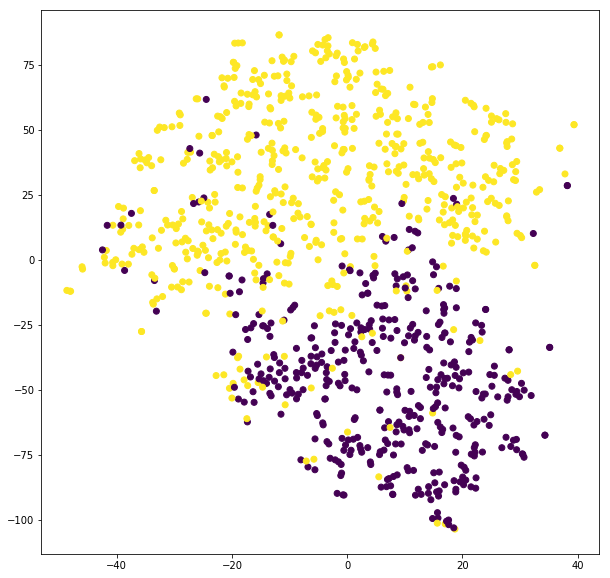

In [86]:
fig = plt.figure(figsize=(10,10))
plt.scatter(y = points[:, 0], x =  points[:, 1], c = df['villa'].replace({'female': 1, 'male': 0}))
plt.show()

In [110]:
# fig = plt.figure(figsize=(10,10))
# plt.scatter(y = points[:, 0], x =  points[:, 1], 
#             c = df['education'].replace(
#                 {'college_bachelor_degree' : 4 , 
#                  'secondary_school' : 3, 
#                  'primary_school' : 2,
#                  'masters_degree' : 5, 
#                  'doctorate_degree' : 6,       
#                  'currently_a_primary_school_pupil' : 1}))
# plt.show()

In [111]:
# fig = plt.figure(figsize=(10,10))
# plt.scatter(y = points[:, 0], x =  points[:, 1], 
#             c = df['left_right_handed'].replace({'right_handed' : 1, 'left_handed' : 0}))
# plt.show()

In [112]:
# fig = plt.figure(figsize=(10,10))
# plt.scatter(y = points[:, 0], x =  points[:, 1], 
#             c = df['smoking'].replace({'never_smoked' : 1, 
#                                                  'tried_smoking' : 2, 
#                                                  'former_smoker' : 3, 
#                                                  'current_smoker' : 4}))
# plt.show()

In [101]:
# fig = plt.figure(figsize=(10,10))
# plt.scatter(y = points[:, 0], x =  points[:, 1], c = df['dancing'])
# plt.show()

    Let's try to visualize the same with PCA

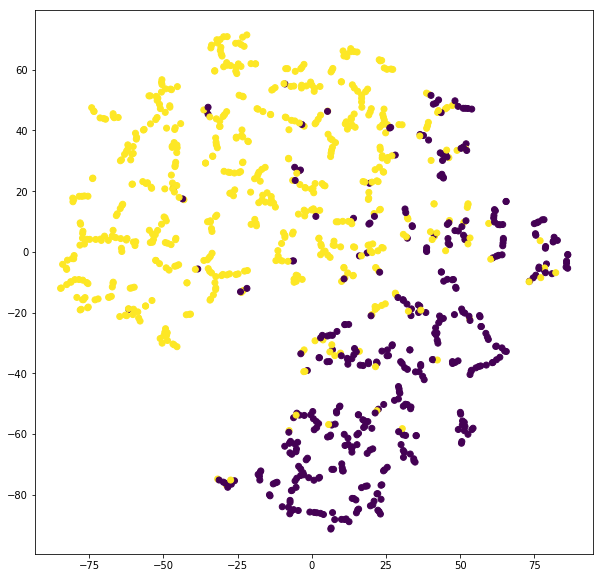

In [106]:
pca = PCA(n_components=5)

pca_points = pca.fit_transform(data)
points = tsne.fit_transform(pca_points)

fig = plt.figure(figsize=(10,10))
plt.scatter(y = points[:, 0], x =  points[:, 1], c = df['gender'].replace({'female': 1, 'male': 0}))
plt.show()

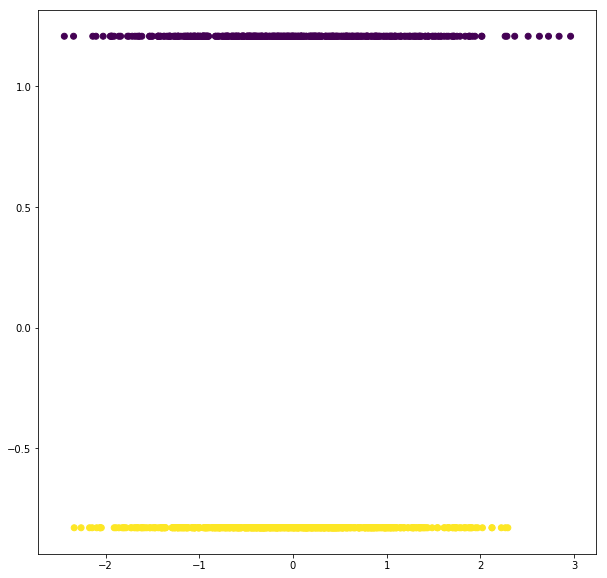

In [102]:
fa = FactorAnalysis(n_components=2)

points = fa.fit_transform(data)

fig = plt.figure(figsize=(10,10))
plt.scatter(y = points[:, 0], x =  points[:, 1], c = df['gender'].replace({'female': 1, 'male': 0}))
plt.show()